In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 지정
plt.rcParams['font.family'] = 'AppleGothic'

# 한글폰트 사용 시 -기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

In [27]:

# 경로 설정
base_path = '/Users/jeonseoyeong/Desktop/fastcampus/패스트캠퍼스 20기(파이썬)/팀플/'

# 변수명과 파일명 쌍 정의
file_list = {
    'aisles': 'aisles.csv',
    'order_prior': 'order_products__prior.csv',
    'order_train': 'order_products__train.csv',
    'orders': 'orders.csv',
    'products': 'products.csv',
    'departments': 'departments.csv'
}

# 반복문으로 개별 변수에 할당
for var_name, file_name in file_list.items():
    globals()[var_name] = pd.read_csv(os.path.join(base_path, file_name))

In [29]:
# products 통합 데이터셋(products + aisles + departments)
products_copy = products
products_copy = products_copy.merge(aisles, on='aisle_id', how='left')
products_merged = products_copy.merge(departments, on='department_id', how='left')
products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [31]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [35]:
# 과거 구매 데이터(order_prior + orders + products + departments)
orders_prior = orders[orders['eval_set'] == 'prior']
prior_df = order_prior.merge(orders_prior, on='order_id', how='left')
prior_df = prior_df.merge(products, on='product_id', how='left')
prior_df = prior_df.merge(departments, on='department_id', how='left')
prior_df = prior_df.merge(aisles, on='aisle_id', how='left')
prior_df

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,produce,fresh fruits


In [37]:
prior_df['days_since_prior_order'] = prior_df['days_since_prior_order'].fillna(0)

In [10]:
prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  department              object 
 14  aisle                   object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.6+ GB


In [39]:
import matplotlib.pyplot as plt

# 한글폰트 지정
plt.rcParams['font.family'] = 'AppleGothic'

# 한글폰트 사용 시 -기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

In [41]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

### 주제 선정 이유

# 기업적 측면



- 기업적 측면

1. 상품이 한 번 이상은 다양하게 구매되고 있음. 상품 다양성 존재 ->  탐색 의지는 존재<br>

2. 재구매율도 전반적으로 좋음.<br>


3. 소수 인기 상품에 재구매 집중 + 다양한 상품 시도하지만 재구매 적음 (롱테일 문제) -> 재구매 성향이 높아 소비 확장 어려움<br>
고객들은 다양한 상품을 시도하나 재구매는 소수 상품에 집중<br>
→ 추천 시스템으로 롱테일 상품 탐색 촉진하고 충성도 있는 상품 외 새로운 상품 노출 필요<br>


- 고객 측면으로 바라봤을 때,

1. 고객 탐색 피로 (Exploration Fatigue) <br>
상품과 카테고리가 너무 많아서 고객이 원하는 상품을 직접 일일이 고르기 어려움 <br>

   고객별 소비 패턴 뚜렷, 개인화 <br>

기업 : 모든 제품이 한번씩은 팔렸는데, 재구매로 이어지는 제품은 소수
재고 상품 순환율 높이는 동시에 판매 

#### (1) 인스타카트의 표면적 측면

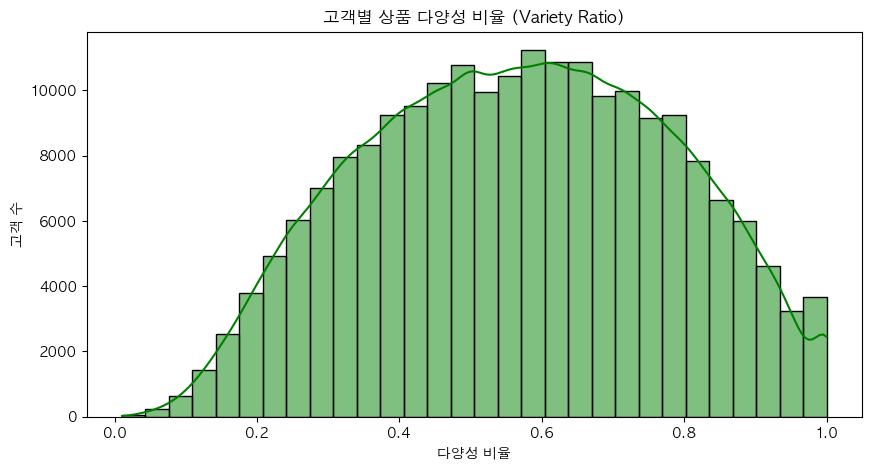

In [23]:
# 고객별 전체 구매 건수
user_total_orders = prior_df.groupby('user_id')['product_id'].count()

# 고객별 서로 다른 상품 수
user_unique_products = prior_df.groupby('user_id')['product_id'].nunique()

# 다양성 지수 = 서로 다른 상품 수 / 총 구매 건수
user_variety_ratio = (user_unique_products / user_total_orders).reset_index()
user_variety_ratio.columns = ['user_id', 'variety_ratio']

# 시각화
plt.figure(figsize=(10,5))
sns.histplot(user_variety_ratio['variety_ratio'], bins=30, color='green', kde=True)
plt.title('고객별 상품 다양성 비율 (Variety Ratio)')
plt.xlabel('다양성 비율')
plt.ylabel('고객 수')
plt.show()


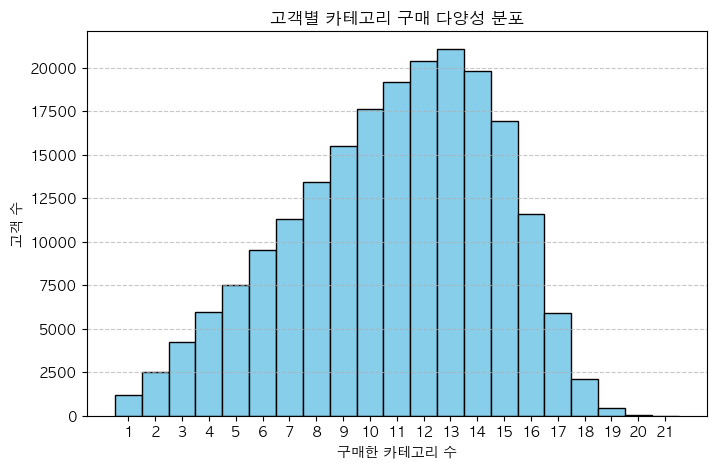

In [15]:
# prior_df: 구매 데이터 (user_id, department 컬럼 포함)

# 1) 고객-카테고리별 구매 건수 집계
user_cat_counts = prior_df.groupby(['user_id', 'department']).size().unstack(fill_value=0)

# 2) 고객별 총 구매 건수
user_total_purchases = user_cat_counts.sum(axis=1)

# 3) 카테고리별 비율 계산
user_cat_ratio = user_cat_counts.div(user_total_purchases, axis=0)

# 4) 다양성 지표 예: 카테고리 수 (비율 > 0인 카테고리 개수)
user_cat_diversity = (user_cat_ratio > 0).sum(axis=1)

# 5) 또는 샤논 다양성 지수(Shannon Diversity Index) 등으로 다양성 측정 가능
import numpy as np
def shannon_entropy(row):
    p = row[row > 0]
    return -np.sum(p * np.log2(p))
user_cat_entropy = user_cat_ratio.apply(shannon_entropy, axis=1)

# 결과 합치기
diversity_df = pd.DataFrame({
    'category_count': user_cat_diversity,
    'category_entropy': user_cat_entropy
})


import matplotlib.pyplot as plt

# 1) 고객-카테고리별 구매 건수 집계
user_cat_counts = prior_df.groupby(['user_id', 'department']).size().unstack(fill_value=0)

# 2) 고객별 총 구매 건수
user_total_purchases = user_cat_counts.sum(axis=1)

# 3) 카테고리별 비율 계산
user_cat_ratio = user_cat_counts.div(user_total_purchases, axis=0)

# 4) 카테고리 다양성 지표: 구매한 카테고리 수 (비율 > 0인 카테고리 개수)
user_cat_diversity = (user_cat_ratio > 0).sum(axis=1)

# 5) 히스토그램 그리기
plt.figure(figsize=(8,5))
plt.hist(user_cat_diversity, bins=range(1, user_cat_diversity.max() + 2), color='skyblue', edgecolor='black', align='left')
plt.title('고객별 카테고리 구매 다양성 분포')
plt.xlabel('구매한 카테고리 수')
plt.ylabel('고객 수')
plt.xticks(range(1, user_cat_diversity.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


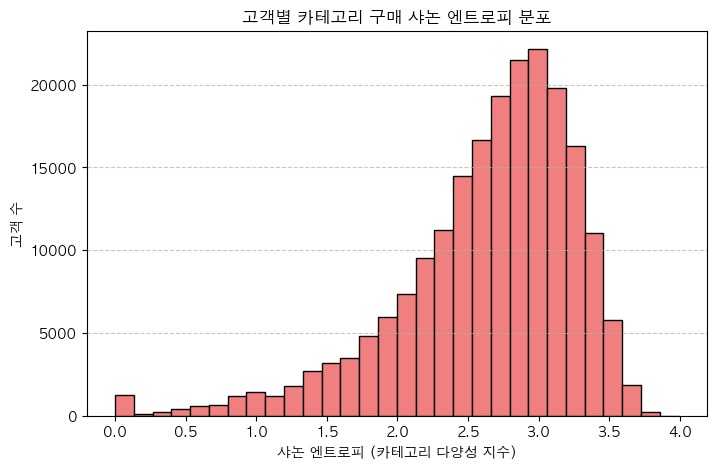

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 고객-카테고리별 구매 건수 집계
user_cat_counts = prior_df.groupby(['user_id', 'department']).size().unstack(fill_value=0)

# 2) 고객별 총 구매 건수
user_total_purchases = user_cat_counts.sum(axis=1)

# 3) 카테고리별 구매 비율 계산 (확률 분포)
user_cat_prob = user_cat_counts.div(user_total_purchases, axis=0)

# 4) 샤논 엔트로피 계산 함수
def shannon_entropy(probs):
    probs = probs[probs > 0]  # 0인 값 제외
    return -np.sum(probs * np.log2(probs))

# 5) 고객별 샤논 엔트로피 계산
user_entropy = user_cat_prob.apply(shannon_entropy, axis=1)

# 6) 히스토그램 그리기
plt.figure(figsize=(8,5))
plt.hist(user_entropy, bins=30, color='lightcoral', edgecolor='black')
plt.title('고객별 카테고리 구매 샤논 엔트로피 분포')
plt.xlabel('샤논 엔트로피 (카테고리 다양성 지수)')
plt.ylabel('고객 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


판매된 상품 비율: 99.98%


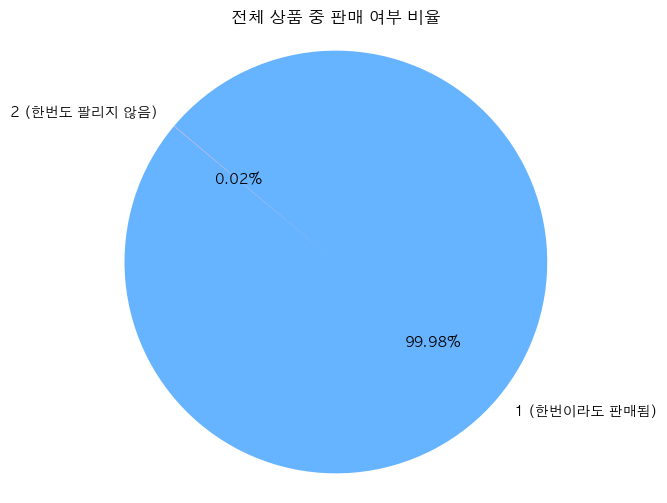

In [29]:
total_products = products['product_id'].nunique()

# 실제로 팔린 상품 수
sold_products = prior_df['product_id'].nunique()
unsold_products = total_products - sold_products

# 비율
sold_ratio = sold_products / total_products
print(f"판매된 상품 비율: {sold_ratio:.2%}")

labels = ['1 (한번이라도 판매됨)', '2 (한번도 팔리지 않음)']
sizes = [sold_products, unsold_products]
colors = ['#66b3ff', '#ff9999']

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title('전체 상품 중 판매 여부 비율')
plt.axis('equal')  # 원형 유지
plt.show()

In [ ]:
생각보다 고객들은 다양한 상품을 구매하고 있고, 실제로 거의 모든 상품이 최소 한 번 이상은 판매됨

고객들의 탐색 의지는 존재함을 알 수 있음 !

재구매 비율: 0.5897 (58.97%)
재구매 비율: 0.5897 (58.97%)


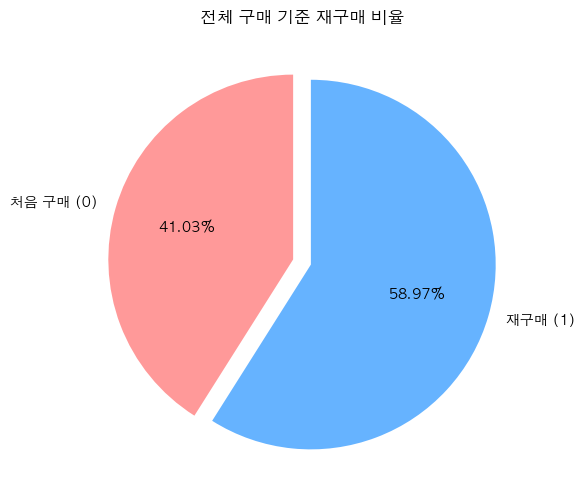

In [33]:
# 전체 구매 횟수 기준 재구매 비율
reorder_rate = prior_df['reordered'].mean()
print(f"재구매 비율: {reorder_rate:.4f} ({reorder_rate*100:.2f}%)")

reorder_rate = prior_df['reordered'].mean()
print(f"재구매 비율: {reorder_rate:.4f} ({reorder_rate*100:.2f}%)")

reorder_counts = prior_df['reordered'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(reorder_counts, labels= ['처음 구매 (0)', '재구매 (1)'], autopct='%.2f%%', startangle=90, colors=['#ff9999', '#66b3ff'], explode=(0.05, 0.05))
plt.title('전체 구매 기준 재구매 비율')

plt.show()

상품구매건수 기준으로 봤을때 , 재구매율 59%로 나쁘지 않음 → 겉보기에는 긍정적인 지표

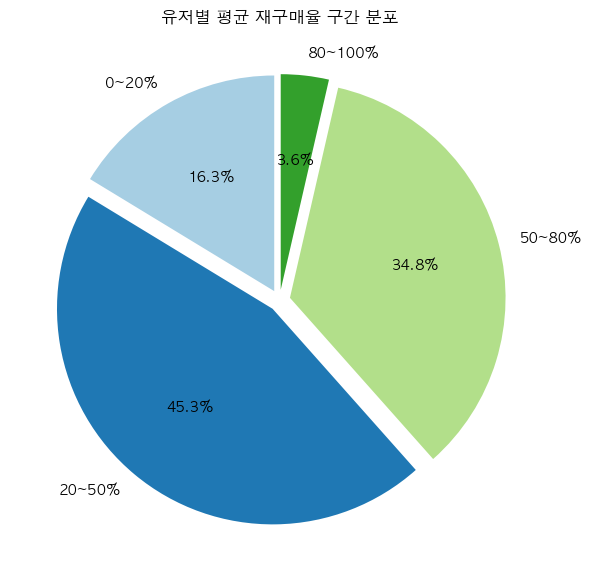

reordered
0~20%      33618
20~50%     93325
50~80%     71856
80~100%     7410
Name: count, dtype: int64

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) 유저별 평균 재구매율 계산 (prior_df 사용)
user_reorder_ratio = prior_df.groupby('user_id')['reordered'].mean()

# 2) 재구매율 구간 설정 및 라벨링
bins = [0.0, 0.2, 0.5, 0.8, 1.0]
labels = ['0~20%', '20~50%', '50~80%', '80~100%']

# 3) 구간별로 유저 나누기
user_reorder_segment = pd.cut(user_reorder_ratio, bins=bins, labels=labels, include_lowest=True, right=True)

# 4) 각 구간별 유저 수 집계
segment_counts = user_reorder_segment.value_counts().sort_index()

# 5) 파이차트 시각화
plt.figure(figsize=(7,7))
colors = plt.cm.Paired.colors[:len(segment_counts)]
plt.pie(segment_counts, labels=segment_counts.index, autopct='%.1f%%', startangle=90, colors=colors, explode=[0.05]*len(segment_counts))
plt.title('유저별 평균 재구매율 구간 분포')
plt.show()

segment_counts

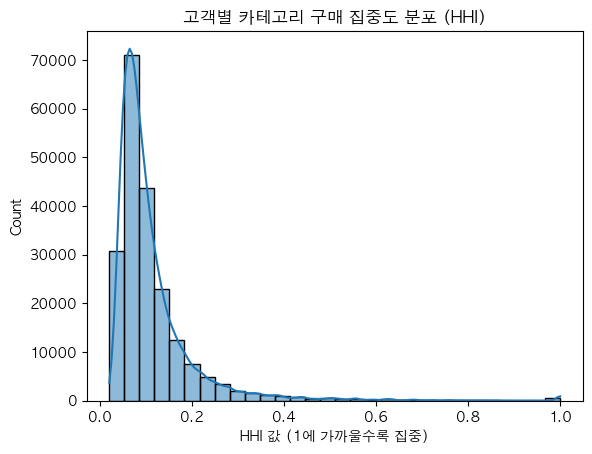

In [18]:
# 고객별 카테고리 구매 횟수 피벗 (예: user_cat_counts)
user_cat_counts = prior_df.pivot_table(index='user_id', columns='aisle', values='product_id', aggfunc='count', fill_value=0)

# 고객별 총 구매 횟수로 나눠서 비율로 변환
user_cat_ratio = user_cat_counts.div(user_cat_counts.sum(axis=1), axis=0)

# HHI 계산
def hhi(row):
    return np.sum(row**2)

user_cat_ratio['HHI'] = user_cat_ratio.apply(hhi, axis=1)

# HHI 분포 시각화
sns.histplot(user_cat_ratio['HHI'], bins=30, kde=True)
plt.title('고객별 카테고리 구매 집중도 분포 (HHI)')
plt.xlabel('HHI 값 (1에 가까울수록 집중)')
plt.show()

- 카테고리 구매가 골고루 분산되어 있어서 집중도(HHI)가 낮다
- 즉, 많은 고객이 특정 카테고리에만 편중하지 않고 여러 카테고리를 다양하게 구매함 (개인 취향에 따라)
- 자신의 취향에 따른 소비 경향

고객은 다양한 카테고리를 고루 경험하지만, 상품 단위로는 익숙한 상품 위주의 소비에 머무름.

   user_id  total_orders_after_first  reordered_orders_count  reorder_rate
0        1                         9                     9.0      1.000000
1        2                        13                    12.0      0.923077
2        3                        11                    11.0      1.000000
3        4                         4                     1.0      0.250000
4        5                         3                     3.0      1.000000


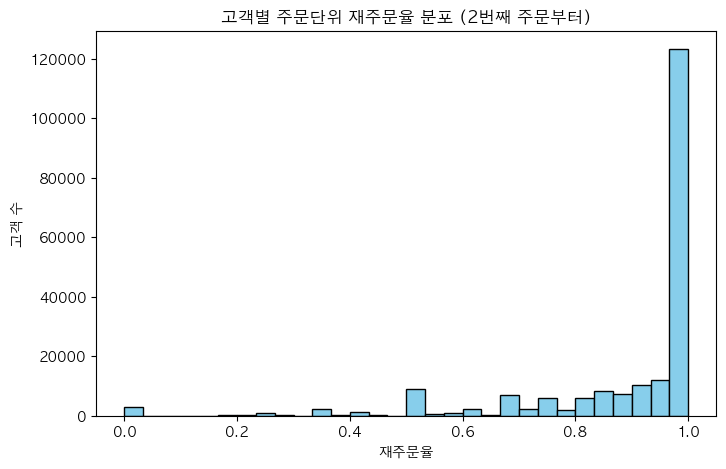

In [63]:
import pandas as pd

# prior_df가 있다고 가정

# 1) 고객별 총 주문 수 계산 (2번째 주문부터)
# 1번째 주문은 신규 주문이니 제외하고 2번째 주문부터 카운트
orders_after_first = prior_df[prior_df['order_number'] > 1]

total_orders_after_first = orders_after_first.groupby('user_id')['order_id'].nunique().reset_index()
total_orders_after_first.columns = ['user_id', 'total_orders_after_first']

# 2) 고객별 재주문(2번째 이후 주문 중 reordered=1인 주문) 수 계산
reordered_orders_after_first = orders_after_first[orders_after_first['reordered'] == 1]
reordered_counts = reordered_orders_after_first.groupby('user_id')['order_id'].nunique().reset_index()
reordered_counts.columns = ['user_id', 'reordered_orders_count']

# 3) 두 데이터 병합
user_reorder_rate = pd.merge(total_orders_after_first, reordered_counts, on='user_id', how='left')
user_reorder_rate['reordered_orders_count'] = user_reorder_rate['reordered_orders_count'].fillna(0)

# 4) 재주문율 계산
user_reorder_rate['reorder_rate'] = user_reorder_rate['reordered_orders_count'] / user_reorder_rate['total_orders_after_first']

# 5) 결과 확인
print(user_reorder_rate.head())

# 6) 분포 시각화 (히스토그램)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(user_reorder_rate['reorder_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('고객별 주문단위 재주문율 분포 (2번째 주문부터)')
plt.xlabel('재주문율')
plt.ylabel('고객 수')
plt.show()



In [71]:
# 고객별 주문 횟수 계산
order_counts = orders.groupby('user_id')['order_id'].nunique()

# 한번만 주문한 고객 수 확인
one_time_customers = (order_counts == 4).sum()

print(f"한 번만 주문한 고객 수: {one_time_customers}")
print(f"전체 고객 수: {order_counts.shape[0]}")


한 번만 주문한 고객 수: 23986
전체 고객 수: 206209


user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_id, Length: 206209, dtype: int64

/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_2411/2464614581.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_reorder_ratio = prior_df.groupby('user_id').apply(


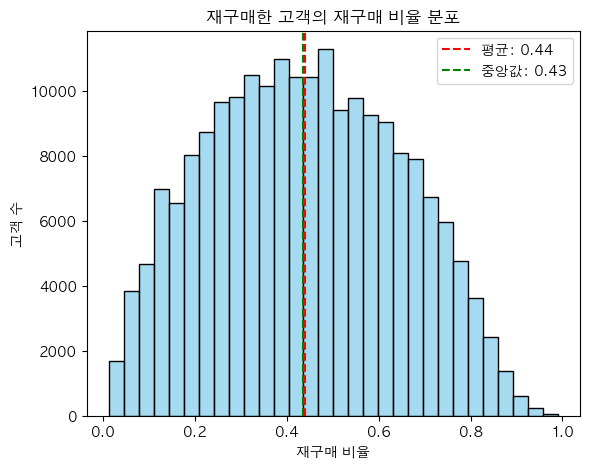

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 고객별 재구매 비율과 재구매 횟수
user_reorder_ratio = prior_df.groupby('user_id').apply(
    lambda x: x['reordered'].sum() / len(x)
)
user_reorder_count = prior_df.groupby('user_id')['reordered'].sum()

# 0보다 큰 값만 필터링 (재구매한 고객만)
filtered_ratio = user_reorder_ratio[user_reorder_ratio > 0]
filtered_count = user_reorder_count[user_reorder_count > 0]

plt.figure(figsize=(14,5))

# 고객별 재구매 비율
plt.subplot(1, 2, 1)
sns.histplot(filtered_ratio, bins=30, color='skyblue')
plt.axvline(filtered_ratio.mean(), color='red', linestyle='--', label=f'평균: {filtered_ratio.mean():.2f}')
plt.axvline(filtered_ratio.median(), color='green', linestyle='--', label=f'중앙값: {filtered_ratio.median():.2f}')
plt.title('재구매한 고객의 재구매 비율 분포')
plt.xlabel('재구매 비율')
plt.ylabel('고객 수')
plt.legend()

고객별 재구매 비율 평균: 44% / 중앙값: 43%

분포: 거의 정규분포 형태로, 대다수 고객이 재구매 비율 30~60% 사이에 분포 → 고객 절반 이상이 전체 구매 중 절반 가까이를 재구매에 사용하고 있음

보기에는 재구매율도 낮은편이 아니고, 상품도 다양하게 팔리고 있고 그렇다면 좋은 상황 아닌가 ???

보기에는 재구매율도 낮은편이 아니고, 상품도 다양하게 팔리고 있고 그렇다면 좋은 상황 아닌가 ???

그럼 내부적인 구조를 자세히 분석해보자 !

### 내부적인 (구조적) 측면

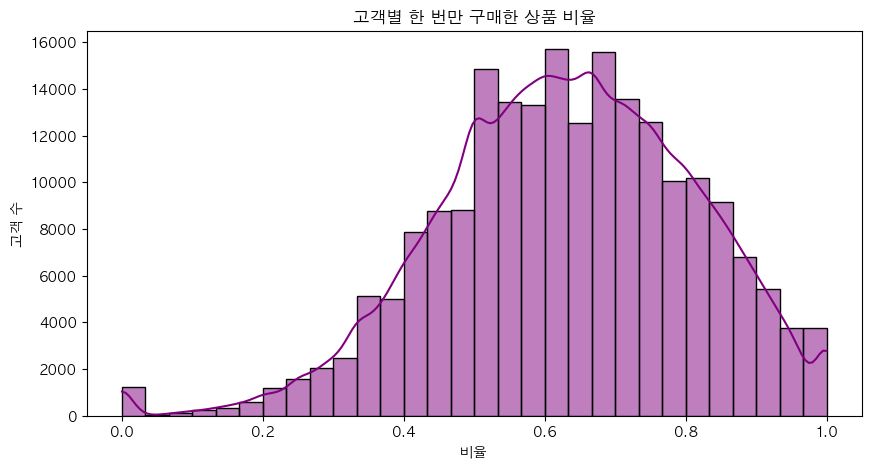

In [49]:
# 고객별 각 상품 구매 횟수
user_product_counts = prior_df.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
user_product_counts.columns = ['user_id', 'product_id', 'product_order_count']

# 한 번만 구매한 상품
one_time = user_product_counts[user_product_counts['product_order_count'] == 1]

# 고객별 한 번만 구매한 상품 수
one_time_count = one_time.groupby('user_id')['product_id'].count()
total_unique = user_product_counts.groupby('user_id')['product_id'].count()

one_time_ratio = (one_time_count / total_unique).fillna(0).reset_index()
one_time_ratio.columns = ['user_id', 'one_time_ratio']

# 시각화
plt.figure(figsize=(10,5))
sns.histplot(one_time_ratio['one_time_ratio'], bins=30, color='purple', kde=True)
plt.title('고객별 한 번만 구매한 상품 비율')
plt.xlabel('비율')
plt.ylabel('고객 수')
plt.show()


다양성 비율과 분포가 거의 유사 -> 객들은 비교적 높은 상품 다양성을 보이지만, 그 중 다수는 한 번만 구매하는 상품임 <br>
-> 고객들은 “다양한 상품을 시도”하지만, 재구매까지 이어지는 상품은 극소수라는 뜻!

재구매율 상위 상품이 포함된 카테고리 수: 21


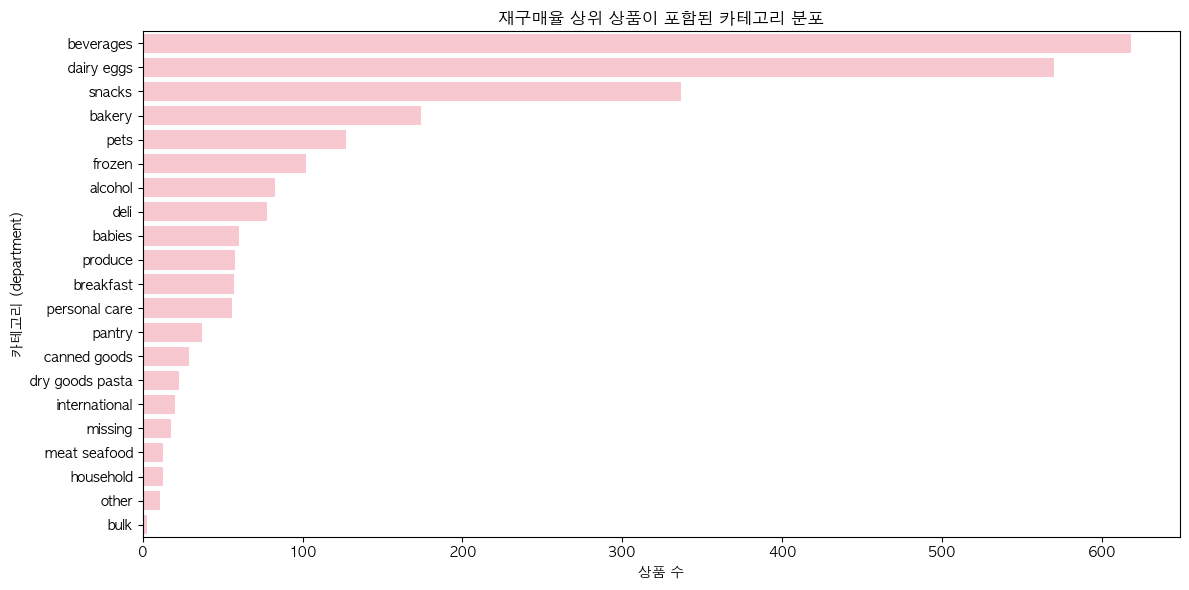

In [89]:
product_reorder_ratio = prior_df.groupby('product_id')['reordered'].mean().reset_index()
product_reorder_ratio.columns = ['product_id', 'reorder_ratio']

threshold = product_reorder_ratio['reorder_ratio'].quantile(0.95)
high_reorder = product_reorder_ratio[product_reorder_ratio['reorder_ratio'] >= threshold]

# product 정보와 병합
high_reorder = pd.merge(high_reorder, products[['product_id', 'department_id']], on='product_id')
# 카테고리 수 세기
num_departments = high_reorder['department_id'].nunique()
print(f"재구매율 상위 상품이 포함된 카테고리 수: {num_departments}")

# 카테고리명도 함께 병합
high_reorder = pd.merge(high_reorder, departments, on='department_id')

plt.figure(figsize=(12,6))
sns.countplot(data=high_reorder, y='department', color = 'pink', order=high_reorder['department'].value_counts().index)
plt.title('재구매율 상위 상품이 포함된 카테고리 분포')
plt.xlabel('상품 수')
plt.ylabel('카테고리 (department)')
plt.tight_layout()
plt.show()


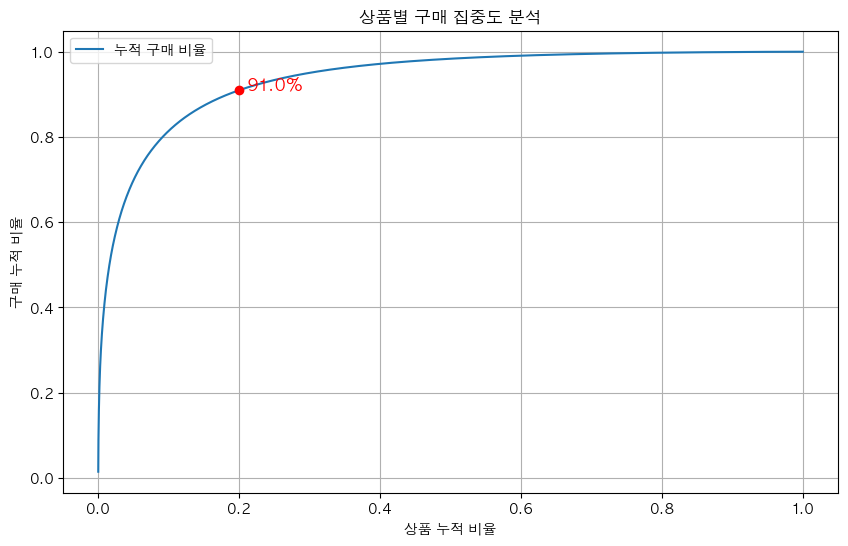

In [51]:
product_order_counts = prior_df['product_id'].value_counts().reset_index()
product_order_counts.columns = ['product_id', 'order_count']

# 누적 비율 계산
product_order_counts['cum_order_ratio'] = product_order_counts['order_count'].cumsum() / product_order_counts['order_count'].sum()
product_order_counts['product_ratio'] = (product_order_counts.index + 1) / len(product_order_counts)

# 상위 20% 지점 index
top_20_index = int(len(product_order_counts) * 0.2)

# x, y 값 추출
x_20 = product_order_counts.loc[top_20_index, 'product_ratio']
y_20 = product_order_counts.loc[top_20_index, 'cum_order_ratio']

# 그래프
plt.figure(figsize=(10,6))
plt.plot(product_order_counts['product_ratio'], product_order_counts['cum_order_ratio'], label='누적 구매 비율')

# 20% 지점 점 찍기 + 텍스트 표시
plt.scatter(x_20, y_20, color='red', zorder=5)
plt.text(x_20 + 0.01, y_20, f'{y_20:.1%}', color='red', fontsize=12)


# 라벨 및 제목
plt.xlabel('상품 누적 비율')
plt.ylabel('구매 누적 비율')
plt.title('상품별 구매 집중도 분석')
plt.grid(True)
plt.legend()
plt.show()


상위 20% 상품이 전체 구매 비율의 무려 91%나 차지됨.
소수 인기 상품에 집중되고, 나머지는 구매가 드문 ‘롱테일’ 현상 심각.

상품간 재구매율 비율 격차 심함 .

그렇다면 왜 이런 현상이 일어나는 것일까??? 그 이유를 고객 측면에서 생각해보자 ..!

# 고객적 측면

## (1) 고객 탐색 범위의 제한

In [66]:
import plotly.express as px
import plotly.io as pio

# 주피터 노트북용 렌더러
pio.renderers.default = 'notebook_connected'

# 데이터 생성
sunburst_data = products_merged.groupby(['department', 'aisle'])['product_name'].nunique().reset_index(name='count')

# 해바라기 차트 생성
fig = px.sunburst(
    sunburst_data,
    path=['department', 'aisle'],
    values='count',
    title='대/소분류 조합 안에 있는 고유한 상품 개수 (상품군 다양성 시각화)',
    width=800,
    height=800
)

# 시각화 출력
fig.show()


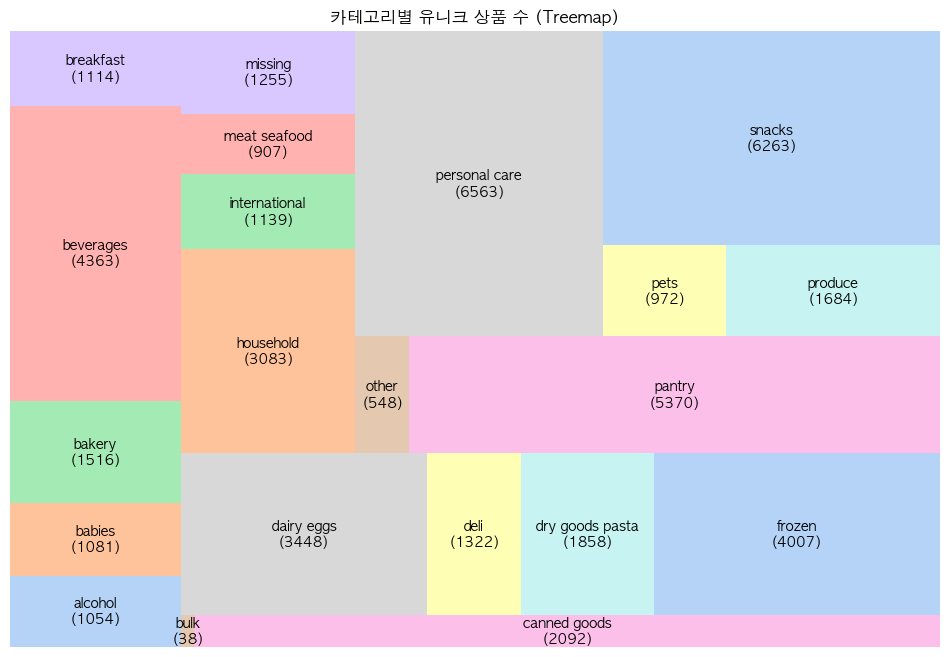

In [68]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns


# 2. department별 유니크 상품 수 세기
dept_product_counts = prior_df.groupby('department')['product_id'].nunique().reset_index()
dept_product_counts.columns = ['department', 'product_count']

# 3. 라벨 생성
labels = [f"{row['department']}\n({row['product_count']})" for _, row in dept_product_counts.iterrows()]
sizes = dept_product_counts['product_count']

# 4. 트리맵 시각화
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.8,
    color=sns.color_palette('pastel', len(labels))  # 파스텔톤 사용
)
plt.title("카테고리별 유니크 상품 수 (Treemap)")
plt.axis('off')
plt.show()

In [75]:
# prior_df에 등장한 상품 기준
prior_df['product_id'].nunique()


49677

## (2) 고객 소비 패턴

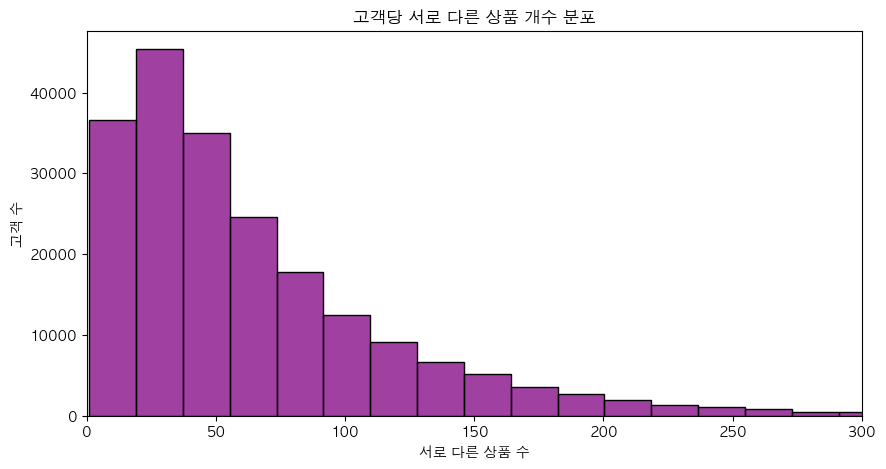

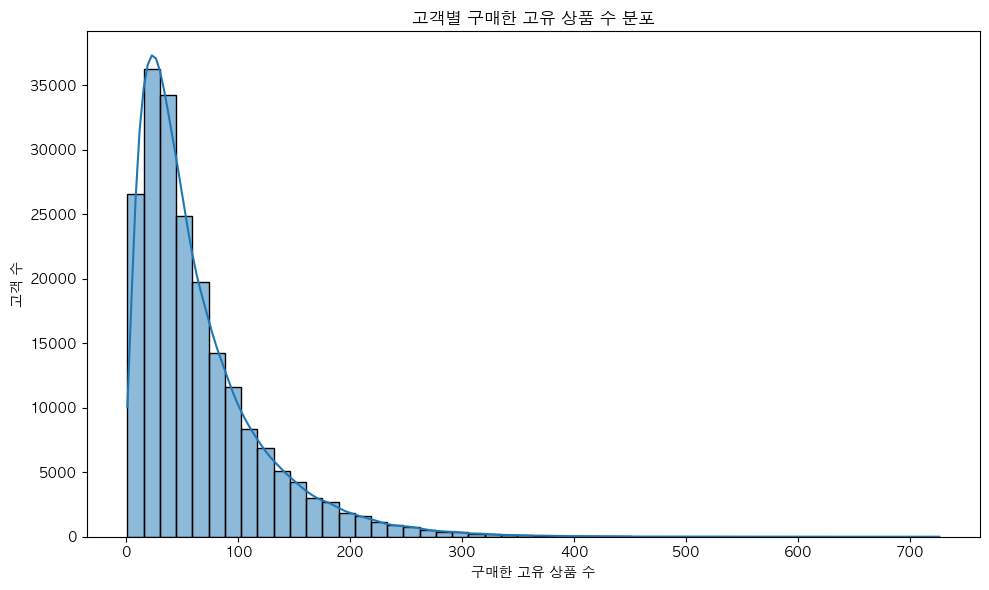

In [78]:
# 고객당 구매한 서로 다른 상품 개수 분포
user_product_variety = prior_df.groupby('user_id')['product_id'].nunique()

plt.figure(figsize=(10,5))
sns.histplot(user_product_variety, bins=40, color='purple')
plt.title('고객당 서로 다른 상품 개수 분포')
plt.xlabel('서로 다른 상품 수')
plt.ylabel('고객 수')
plt.xlim(0, 300)  # 시각적으로 집중 구간 강조
plt.show()

user_product_count = prior_df.groupby('user_id')['product_id'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(user_product_count, bins=50, kde=True)
plt.title('고객별 구매한 고유 상품 수 분포')
plt.xlabel('구매한 고유 상품 수')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

Instacart에 등록된 전체 상품은 수천 개 이상이지만
→ 개인 고객이 경험하는 상품은 극히 제한적 
-> 일정한 구매 패턴에 갇혀 있고 익숙한 상품 중심으로 반복 구매하는 소비하고 있음을 의미
-> 추천 시스템을 통해 미경험 상품 탐색을 유도하는 것이 중요



* 대부분 고객은 적은 수의 상품만 반복 구매하고, 소수만 다양한 상품을 구매
* → 고객의 구매 패턴은 획일적이지 않다
* 모든 고객에게 동일한 방식의 추천을 적용하는 방식은 효과가 떨어질 수 있다, 고객별 맞춤 추천이 좋아 보인다.

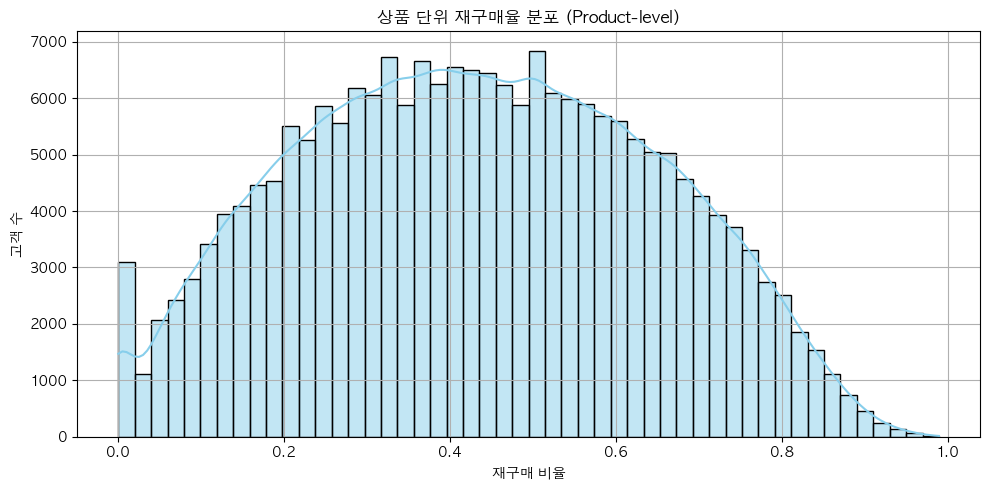

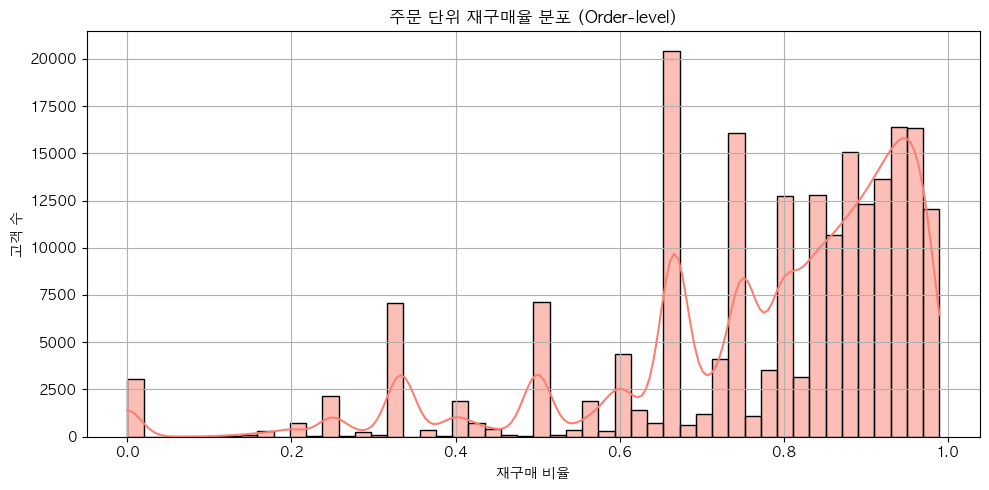

In [75]:
# ((1)) 고객별 총 주문 수 계산

total_order_per_user = prior_df.groupby('user_id')['order_id'].count().reset_index()
total_order_per_user.columns = ['user_id', 'total_order']


# ((2)) 고객별 재구매 건 수 계산

reordered_per_user = prior_df[prior_df['reordered']==1].groupby('user_id')['order_id'].count().reset_index()
reordered_per_user.columns = ['user_id', 'reordered_count']

# 두 데이터 병합
user_reorder = pd.merge(total_order_per_user, reordered_per_user, on='user_id', how='left')
user_reorder['reordered_count'] = user_reorder['reordered_count'].fillna(0)

# 고객별 재구매 비율 계산
user_reorder['product_reorder_ratio'] = user_reorder['reordered_count'] / user_reorder['total_order']

# 결과 확인
user_reorder.head()




### 고객의 주문들 중에서, 재구매 상품이 하나라도 포함된 주문의 비율
## (주문 단위)
# 총 10번 주문했는데, 그중 6번 주문에 재구매 상품이 있음 → 0.6


# 고객별 주문 ID 목록 가져오기
user_order_df = prior_df[['user_id', 'order_id', 'reordered']].drop_duplicates()

# (1) 고객별 총 주문 수
total_order_per_user = user_order_df.groupby('user_id')['order_id'].nunique().reset_index()
total_order_per_user.columns = ['user_id', 'total_orders']

# (2) 재구매 상품이 포함된 주문만 필터링
reordered_orders = user_order_df[user_order_df['reordered'] == 1][['user_id', 'order_id']].drop_duplicates()
reordered_order_count = reordered_orders.groupby('user_id')['order_id'].count().reset_index()
reordered_order_count.columns = ['user_id', 'reordered_orders']

# (3) 병합 후 비율 계산
user_reorder2 = pd.merge(total_order_per_user, reordered_order_count, on='user_id', how='left')
user_reorder2['reordered_orders'] = user_reorder2['reordered_orders'].fillna(0)
user_reorder['order_reorder_ratio'] = user_reorder2['reordered_orders'] / user_reorder2['total_orders']
user_reorder


plt.figure(figsize=(10, 5))
sns.histplot(user_reorder['product_reorder_ratio'], bins=50, kde=True, color='skyblue')
plt.title('상품 단위 재구매율 분포 (Product-level)')
plt.xlabel('재구매 비율')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(user_reorder['order_reorder_ratio'], bins=50, kde=True, color='salmon')
plt.title('주문 단위 재구매율 분포 (Order-level)')
plt.xlabel('재구매 비율')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()

주문 단위로 보면, 고객 대부분은 주문할 때 재구매 상품을 하나 이상 포함함.

하지만 상품 단위로 보면, 재구매율은 대체로 0.3~0.5 수준으로 아주 높지는 않음 <br>
➡️ 고객은 매 주문 시 익숙한 일부 상품을 중심으로, 나머지는 새로운 상품으로 구성하는 경향.<br>
➡️  ** 즉, 충성도 높은 핵심 상품 + 탐색적 소비의 패턴 ***이 나타남.

고객은 주문마다 충성도 높은 일부 상품 + 탐색 상품을 조합하여 구매하는 경향.

다만, 탐색 범위는 매우 제한적이며 소수 상품 중심 소비 구조가 뚜렷함.

고객 간 소비 패턴의 차이도 커서 획일적인 추천은 효과가 떨어짐


소비자의 성향과 구매 패턴을 분석해보면,
*** ‘재구매율이 높은 소수의 인기 상품’ +  ‘탐색적 소비를 하는 다양한 상품’ ***** 으로 나뉘어 구매가 이루어지고 있음

따라서, 재구매율이 높은 인기 상품을 기본 추천 상품으로 설정하고,
고객 취향 또는 인기 상품과의 유사성을 기반으로 한 확장 추천하는 것이 효과적일거라 예상 !


<기대효과>
기업적 측면:  상품간 재구매율 격차 해결, 재고 순환 문제 개선, 고객 이탈 방지, 매출 증대 기대
고객 측면: 신뢰를 기반으로 한 개인 취향 반영 상품 추천. 탐색 의지 충족 및 신상품 발견 기회 제공, 고객 탐색 피로 감소로 편리한 쇼핑 경험 제공

### 고객 세분화 하기 EDA

# 사용자별 요일/시간별 구매 횟수 집계
order_heatmap = prior_df.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='count')
order_heatmap_pivot = order_heatmap.pivot(index='order_dow', columns='order_hour_of_day', values='count')

plt.figure(figsize=(25, 7))
sns.heatmap(order_heatmap_pivot, cmap='YlGnBu', annot=True, fmt='d', annot_kws={'size': 15})
plt.title('요일-시간대별 전체 구매 분포 (소비 시간 패턴)')
plt.xlabel('시간대')
plt.ylabel('요일 (0=일요일)')
plt.tight_layout()
plt.show()

* 요일-시간대별 구매 분포 분석 결과, 전체 주문은 주로 오전 8시부터 오후 18시 사이에 집중되며, 특히 일요일(0)과 월요일(1)에 주문 빈도가 가장 높았다. 
* 이러한 소비 패턴은 추천 시스템이 시간 기반 맞춤 전략을 수립하는 데 유용한 근거가 되며, 향후 시간대별 프로모션 기획이나 추천 타이밍 최적화 등에 효과적으로 활용될 수 있다.

| 고객군      | 추천 시스템 필요성 요약                        |
| -------- | ------------------------------------ |
| 이탈 가능 고객 | 관심 유도 / 진입장벽 제거 / 이탈 방지              |
| 기존 고객    | 탐색 비용 감소 / 신상품 노출 / 충성 고객 전환 유도      |
| 충성 고객    | 교차 판매 / 장바구니 다양화 / 지루함 방지 / 유지 전략 강화 |


-> ‘재구매율 향상’을 통한 장기적 고객 관계 관리를 목표


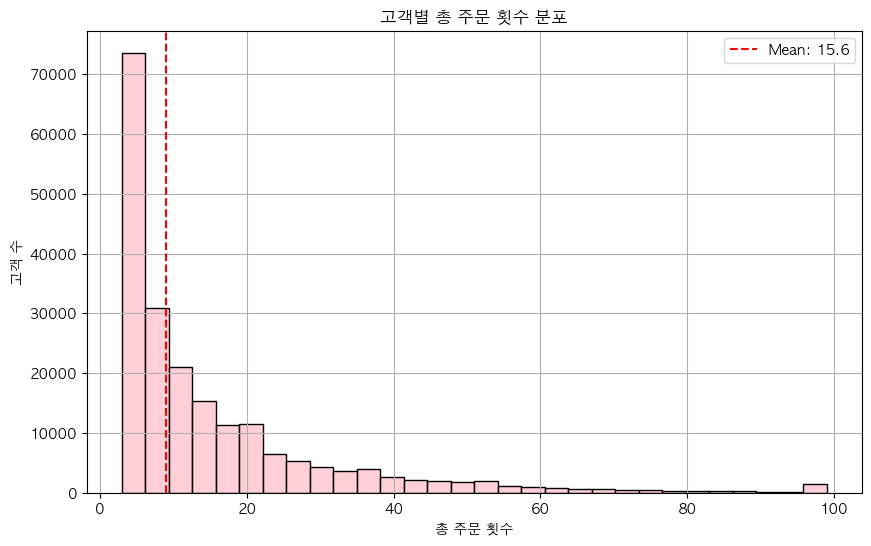

In [103]:
# 고객별 총 주문 횟수 집계
order_counts = orders_prior.groupby('user_id')['order_number'].max()

plt.figure(figsize=(10,6))
sns.histplot(order_counts, bins=30, kde=False, color='pink')
plt.title('고객별 총 주문 횟수 분포')
plt.xlabel('총 주문 횟수')
plt.ylabel('고객 수')
plt.axvline(order_counts.median(), color='red', linestyle='--', label=f'Mean: {order_counts.mean().round(1)}')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
unique_customers_prior = prior_df['user_id'].nunique()
print(f"Prior 데이터 내 고객 수: {unique_customers_prior}명")


Prior 데이터 내 고객 수: 206209명


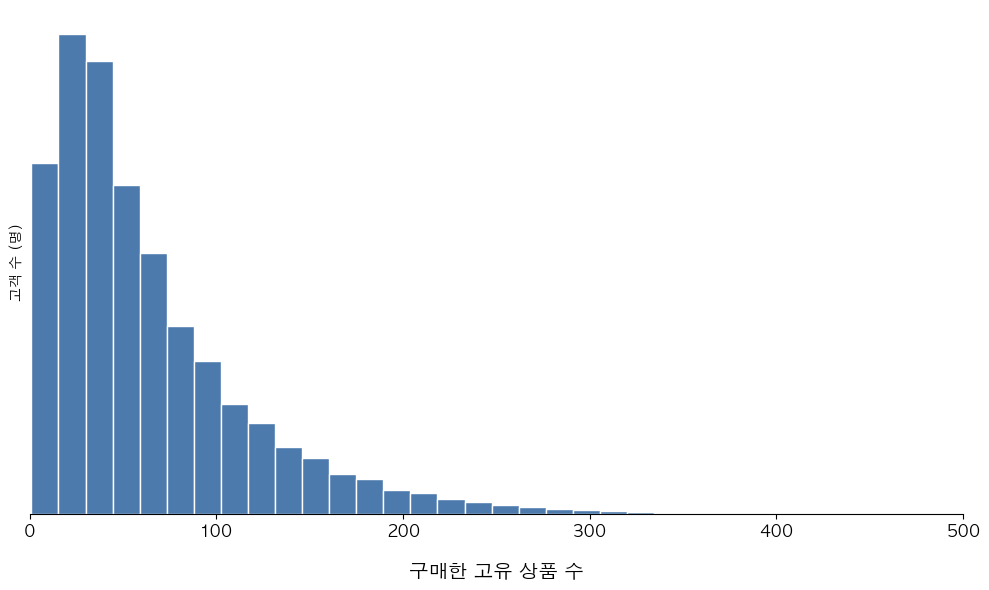

In [103]:
plt.figure(figsize=(10, 6))

sns.histplot(user_product_count,
             bins=50, kde=False, color='#00428B',alpha=0.7, edgecolor='white')

# X축 라벨 설정 (fontsize와 labelpad 추가)
plt.xlabel('구매한 고유 상품 수', fontsize=14, labelpad=15)

# Y축 라벨 제거
plt.ylabel('고객 수 (명)') # 주석 처리

# X축 눈금(ticks) 글자 크기 설정
plt.xticks(fontsize=12)
plt.xlim(0,500)
# 그래프 테두리(Spines) 제거
sns.despine(left=True)

# Y축 눈금(ticks) 제거
plt.yticks([])

plt.tight_layout()

# 배경 없이 이미지로 저장
plt.savefig('graph.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


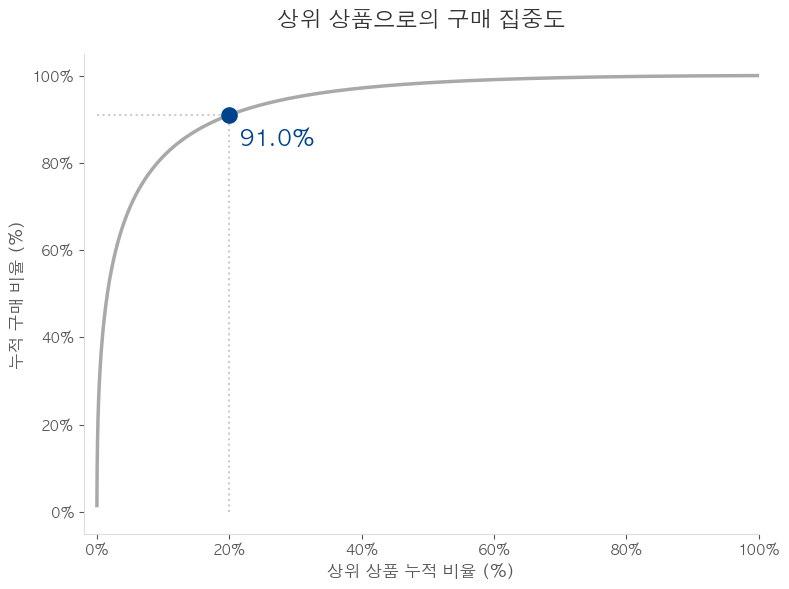

In [123]:
from matplotlib.ticker import FuncFormatter

product_order_counts = prior_df['product_id'].value_counts().reset_index()
product_order_counts.columns = ['product_id', 'order_count']

# 누적 비율 계산
product_order_counts['cum_order_ratio'] = product_order_counts['order_count'].cumsum() / product_order_counts['order_count'].sum()
product_order_counts['product_ratio'] = (product_order_counts.index + 1) / len(product_order_counts)

# 상위 20% 지점 index
top_20_index = int(len(product_order_counts) * 0.2)

# x, y 값 추출
x_20 = product_order_counts.loc[top_20_index, 'product_ratio']
y_20 = product_order_counts.loc[top_20_index, 'cum_order_ratio']



## <<< [비율 및 범위 최종 수정 1: 세로로 긴 비율로 복원] >>>
# figsize를 원래의 세로가 더 긴 형태로 복원하거나, 필요에 맞게 조절합니다.
# (8, 6)은 표준적인 보기 좋은 비율입니다.
fig, ax = plt.subplots(figsize=(8, 6)) 

# 기본 라인
ax.plot(product_order_counts['product_ratio'], product_order_counts['cum_order_ratio'], 
        color='#A9A9A9', linewidth=2.5, zorder=1)

# 20% 지점 점
ax.scatter(x_20, y_20, color='#00428B', s=120, zorder=3) # 점 크기도 살짝 키워줍니다(100->120)

# 값 라벨
ax.text(x_20 + 0.015, y_20 - 0.03, f'{y_20:.1%}', # x,y 좌표 미세조정
        color='#00428B', 
        fontsize=16, 
        fontweight='bold',
        verticalalignment='top')

# 참조선(점선)
ax.vlines(x=x_20, ymin=0, ymax=y_20, color='#CCCCCC', linestyle='dotted', linewidth=1.5, zorder=2)
ax.hlines(y=y_20, xmin=0, xmax=x_20, color='#CCCCCC', linestyle='dotted', linewidth=1.5, zorder=2)

# --- 3. 디자인 다듬기 (최종 수정) ---

ax.set_title('상위 상품으로의 구매 집중도', fontsize=16, pad=20, color='#333333')
ax.set_xlabel('상위 상품 누적 비율 (%)', fontsize=12, color='#555555')
ax.set_ylabel('누적 구매 비율 (%)', fontsize=12, color='#555555')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.tick_params(axis='both', which='major', labelsize=10, colors='#555555')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#DDDDDD')
ax.grid(False)

## <<< [비율 및 범위 최종 수정 2: X축 40%까지만 표시] >>>
# x축의 범위를 0% ~ 40%로 설정하여, 가장 급격한 변화 구간을 더욱 확대하여 보여줍니다.
ax.set_xlim(-0.02, 1) 

fig.patch.set_facecolor('none')
ax.patch.set_facecolor('none')

plt.tight_layout()
# plt.savefig('pareto_chart_final_focused.png', dpi=300, transparent=True)
plt.show()